Measuring essential soil metrics such as nitrogen, phosphorous, potassium levels, and pH value is an important aspect of assessing soil condition. However, it can be an expensive and time-consuming process, which can cause farmers to prioritize which metrics to measure based on their budget constraints.

Farmers have various options when it comes to deciding which crop to plant each season. Their primary objective is to maximize the yield of their crops, taking into account different factors. One crucial factor that affects crop growth is the condition of the soil in the field, which can be assessed by measuring basic elements such as nitrogen and potassium levels. Each crop has an ideal soil condition that ensures optimal growth and maximum yield.

A farmer reached out to you as a machine learning expert for assistance in selecting the best crop for his field. They've provided you with a dataset called soil_measures.csv, which contains:

"N": Nitrogen content ratio in the soil
"P": Phosphorous content ratio in the soil
"K": Potassium content ratio in the soil
"pH" value of the soil
"crop": categorical values that contain various crops (target variable).
Each row in this dataset represents various measures of the soil in a particular field. Based on these measurements, the crop specified in the "crop" column is the optimal choice for that field.

In this project, you will apply machine learning to build a multi-class classification model to predict the type of "crop", while using techniques to avoid multicollinearity, which is a concept where two or more features are highly correlated.

Instructions: 
Build a multi-class Logistic Regression model to predict categories of "crop" with a F1 score of more than 0.5.

Read in soil_measures.csv as a pandas DataFrame and perform some data checks, such as determining the number of crops, checking for missing values, and verifying that the data in each potential feature column is numeric.
Split the data into training and test sets, setting test_size equal to 20% and using a random_state of 42.
Predict the "crop" type using each feature individually by looping over all the features, and, for each feature, fit a Logistic Regression model and calculate f1_score(). When creating the model, set max_iter to 2000 so the model can converge, and pass an appropriate string value to the multi_class keyword argument.
In order to avoid selecting two features that are highly correlated, perform a correlation analysis for each pair of features, enabling you to build a final model without the presence of multicollinearity.
Once you have your final features, train and test a new Logistic Regression model called log_reg, then evaluate performance using f1_score(), saving the metric as a variable called model_performance.

In [6]:
%pip install seaborn

   ---------------------------------------- 0.0/294.6 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.6 kB ? eta -:--:--
   ----- --------------------------------- 41.0/294.6 kB 330.3 kB/s eta 0:00:01
   ---------- ---------------------------- 81.9/294.6 kB 512.0 kB/s eta 0:00:01
   -------------- ----------------------- 112.6/294.6 kB 595.3 kB/s eta 0:00:01
   --------------------------------- ------ 245.8/294.6 kB 1.1 MB/s eta 0:00:01
   ------------------------------------ - 286.7/294.6 kB 983.9 kB/s eta 0:00:01
   -------------------------------------- 294.6/294.6 kB 957.4 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# All required libraries are imported here for you.
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import f1_score

Performing some initial checks  to understand the structure of the data, identify missing values, verify data types, examine summary statistics, and determine the unique classes in the 'crop' column.

In [4]:
# Load the dataset
crops = pd.read_csv("soil_measures.csv")

# Display the first few rows of the dataset
print(crops.head())

# Check for missing values
print(crops.isnull().sum())

# Check data types of columns
print(crops.dtypes)

# Summary statistics
print(crops.describe())

# Check the unique values in the 'crop' column
print(crops['crop'].unique())

    N   P   K        ph  crop
0  90  42  43  6.502985  rice
1  85  58  41  7.038096  rice
2  60  55  44  7.840207  rice
3  74  35  40  6.980401  rice
4  78  42  42  7.628473  rice
N       0
P       0
K       0
ph      0
crop    0
dtype: int64
N         int64
P         int64
K         int64
ph      float64
crop     object
dtype: object
                 N            P            K           ph
count  2200.000000  2200.000000  2200.000000  2200.000000
mean     50.551818    53.362727    48.149091     6.469480
std      36.917334    32.985883    50.647931     0.773938
min       0.000000     5.000000     5.000000     3.504752
25%      21.000000    28.000000    20.000000     5.971693
50%      37.000000    51.000000    32.000000     6.425045
75%      84.250000    68.000000    49.000000     6.923643
max     140.000000   145.000000   205.000000     9.935091
['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 '

Split data into training and test sets, loop through each feature to fit a Logistic Regression model separately for each feature, and calculate the F1 score for each model:

In [5]:
from sklearn.preprocessing import StandardScaler

# Separate features and target variable
X = crops.drop(columns=['crop'])
y = crops['crop']

# Split the data into training and test sets (using a 80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Loop through each feature, fit Logistic Regression models, and calculate F1 score
model_performance = {}

for feature in X.columns:
    # Use only the current feature
    X_train_feature = X_train[[feature]]
    X_test_feature = X_test[[feature]]
    
    # Standardize features
    scaler = StandardScaler()
    X_train_feature_scaled = scaler.fit_transform(X_train_feature)
    X_test_feature_scaled = scaler.transform(X_test_feature)
    
    # Fit Logistic Regression model
    log_reg = LogisticRegression(max_iter=2000, multi_class='auto')
    log_reg.fit(X_train_feature_scaled, y_train)
    
    # Predict and calculate F1 score
    y_pred = log_reg.predict(X_test_feature_scaled)
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Store F1 score for the current feature
    model_performance[feature] = f1

# Display F1 scores for each feature
for feature, f1_score in model_performance.items():
    print(f"{feature}: {f1_score}")

# evaluates model's accuracy


N: 0.10689900116508289
P: 0.08426955444720076
K: 0.13831456375684123
ph: 0.045464856528065166


Perform correlation analysis for each pair of features to build a final model without highly correlated features

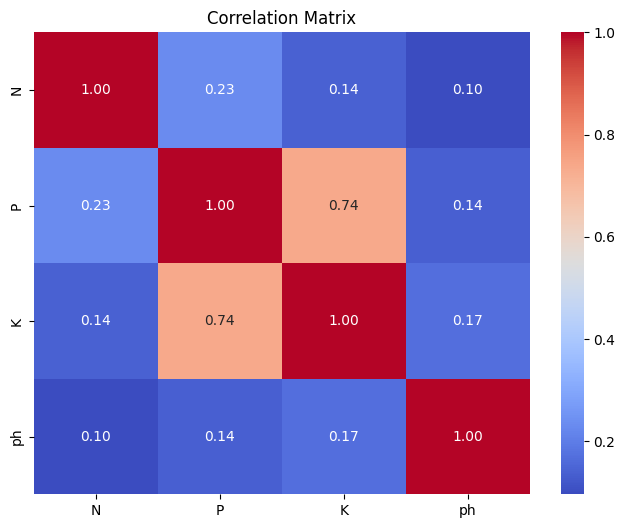

In [6]:
# Calculate correlation matrix
correlation_matrix = X.corr().abs()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()